In [1]:
def get_gist(id):
  import requests, json
  d = json.loads(requests.get(f"https://api.github.com/gists/{id}").content.decode("utf-8"))
  for file_name in d["files"]: # save all the files exactly like on your gist
    with open(file_name, "w") as f:
      print("Writing:", file_name)
      f.write(d["files"][file_name]["content"])
        
get_gist("62df9d16858a43775c22a6af00a8d707")

Writing: daily.py


In [1]:
import os
import sys
from daily import *


sys.path.append(folder("."))
from stylegan2.model import StyleGAN2Model, image_grid

import torch
import matplotlib.pyplot as plt
%matplotlib inline

from einops.einops import repeat, rearrange
import numpy as np

import torchvision

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/kornia/augmentation/augmentation.py:1830: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  warnings.warn(


In [2]:
model = StyleGAN2Model(batch_size = 1)
model.num_params

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading model from ... /Users/yashbonde/Desktop/designs/sanskrit/StyleGAN2-Art/.models/model_45.pt


49146273

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 4.38 s, sys: 2.69 s, total: 7.08 s
Wall time: 4.16 s


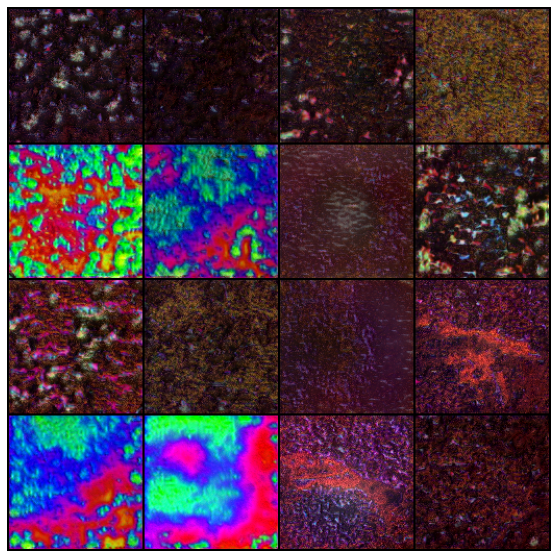

In [3]:
%%time
samples = model.sample(16) # random z, random_noise
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 4.12 s, sys: 2.37 s, total: 6.49 s
Wall time: 3.76 s


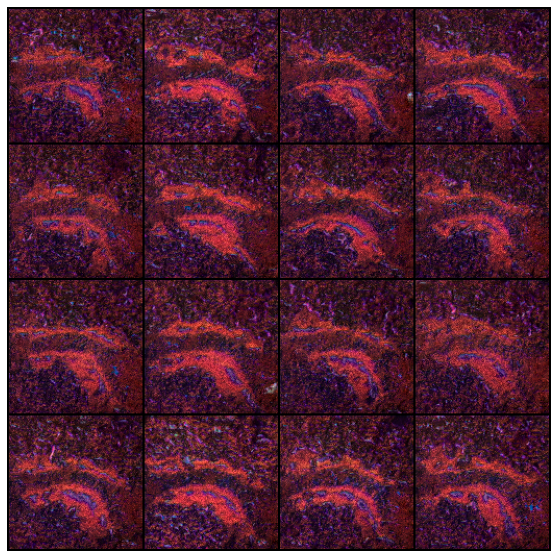

In [4]:
%%time
samples = model.sample(16, True, False) # same z, random_noise
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 4.36 s, sys: 2.52 s, total: 6.88 s
Wall time: 4.03 s


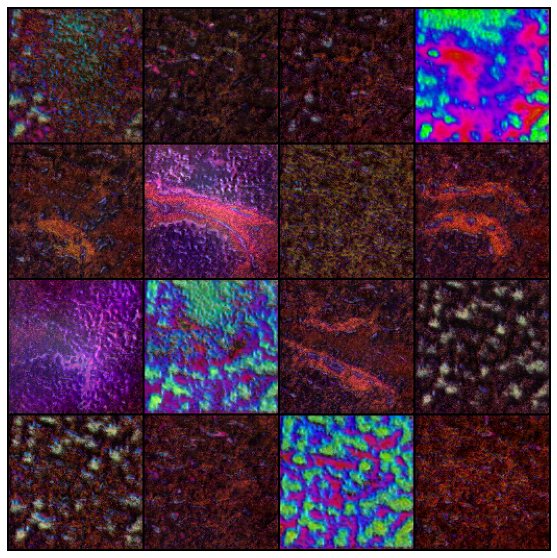

In [3]:
%%time
samples = model.sample(16, False, True) # random z, same noise
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 16.8 s, sys: 9.04 s, total: 25.8 s
Wall time: 15.3 s


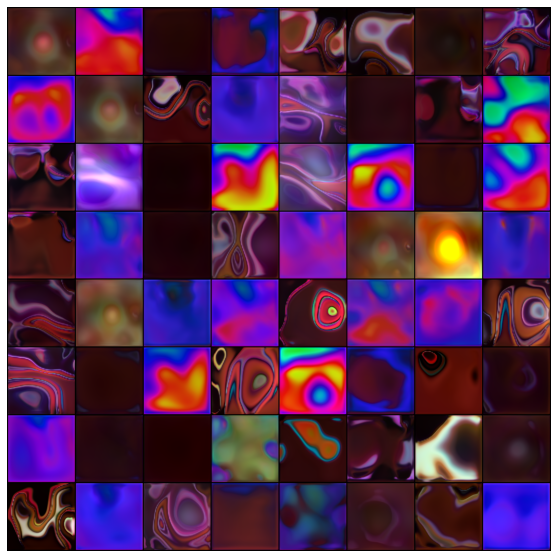

In [12]:
%%time
b = 64
noise = np.zeros((b, model.image_size, model.image_size, 1))
z = np.zeros((b, model.latent_dim))

for i in range(b):
  z[i][i] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 8))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 17.4 s, sys: 9.34 s, total: 26.8 s
Wall time: 16.1 s


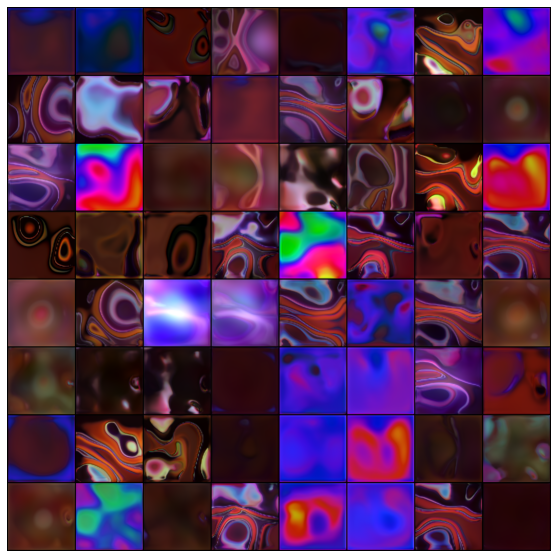

In [13]:
%%time
b = 64
noise = np.zeros((b, model.image_size, model.image_size, 1))
z = np.zeros((b, model.latent_dim))

for i in range(b):
  z[i][i + 64] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 8))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 17 s, sys: 8.84 s, total: 25.8 s
Wall time: 15.3 s


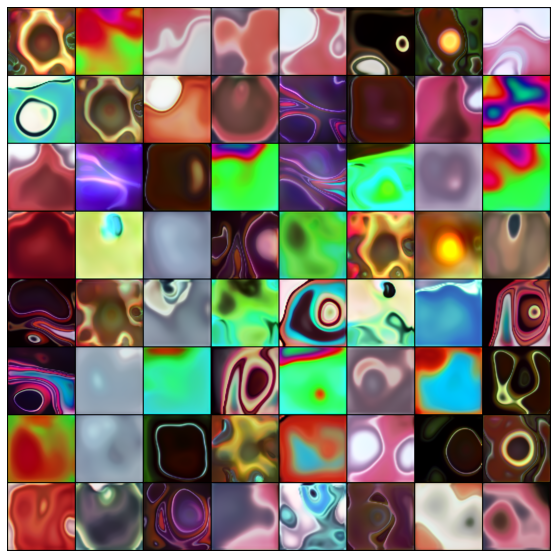

In [14]:
%%time
b = 64
noise = np.ones((b, model.image_size, model.image_size, 1))
z = np.zeros((b, model.latent_dim))

for i in range(b):
  z[i][i] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 8))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 16.9 s, sys: 9.06 s, total: 25.9 s
Wall time: 15.4 s


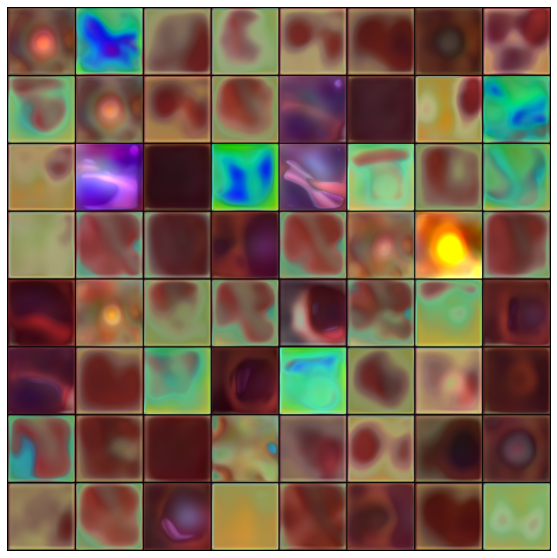

In [26]:
%%time
b = 64
noise = np.ones((b, model.image_size, model.image_size, 1)) * -1
z = np.zeros((b, model.latent_dim))

for i in range(b):
  z[i][i] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 8))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 5.6 s, sys: 3.68 s, total: 9.28 s
Wall time: 6.03 s


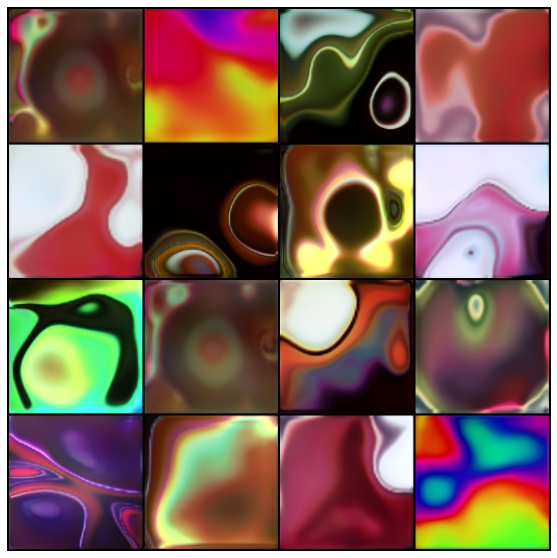

In [47]:
%%time
b = 16
noise = np.linspace(-1, 1, model.image_size).reshape(1, -1)
noise = noise.T @ noise
# plt.imshow(noise)
noise = noise.reshape(*noise.shape, 1)
noise = np.tile(noise, [b, 1, 1, 1])

z = np.zeros((b, model.latent_dim))
for i in range(b):
  z[i][i] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 5.37 s, sys: 3.1 s, total: 8.46 s
Wall time: 5.02 s


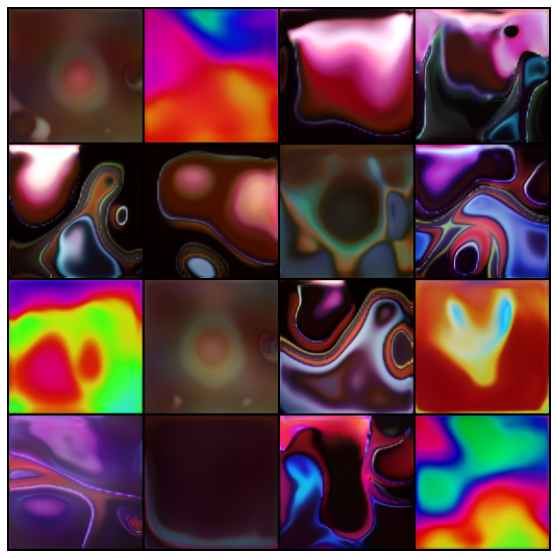

In [50]:
%%time
b = 16
noise = np.linspace(0, 1, model.image_size).reshape(-1, 1)
noise = np.tile(noise, [b, model.image_size, 1, 1])
# plt.imshow(noise[0])

z = np.zeros((b, model.latent_dim))
for i in range(b):
  z[i][i] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 5.82 s, sys: 3.25 s, total: 9.07 s
Wall time: 5.36 s


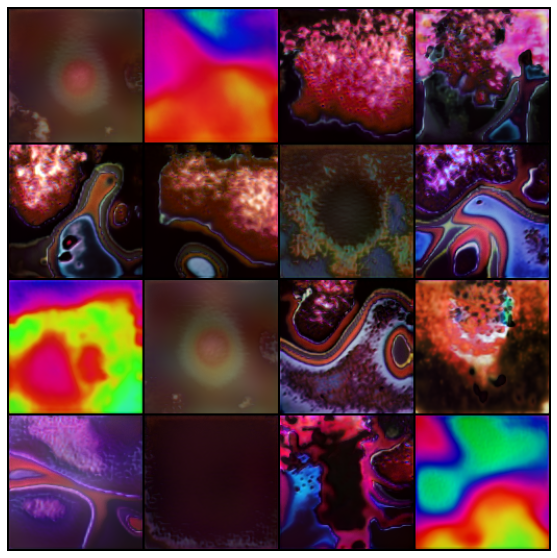

In [52]:
%%time
b = 16
noise = np.linspace(0, 1, model.image_size).reshape(-1, 1)
noise = np.tile(noise, [b, model.image_size, 1, 1])
noise = noise + np.random.randn(*noise.shape) * 0.1
# plt.imshow(noise[0])

z = np.zeros((b, model.latent_dim))
for i in range(b):
  z[i][i] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 6.92 s, sys: 3.67 s, total: 10.6 s
Wall time: 6.26 s


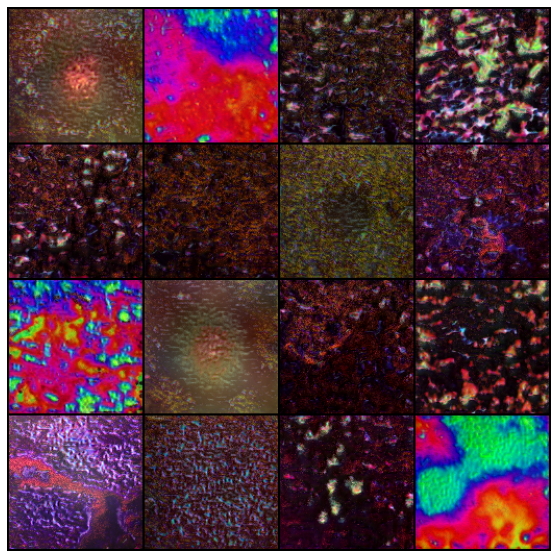

In [57]:
%%time
b = 16
noise = np.linspace(0, 1, model.image_size).reshape(-1, 1)
noise = np.tile(noise, [b, model.image_size, 1, 1])
noise = noise + np.random.randn(*noise.shape) * 1.
# plt.imshow(noise[0])

z = np.zeros((b, model.latent_dim))
for i in range(b):
  z[i][i] = 1

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 6.9 s, sys: 3.78 s, total: 10.7 s
Wall time: 6.21 s


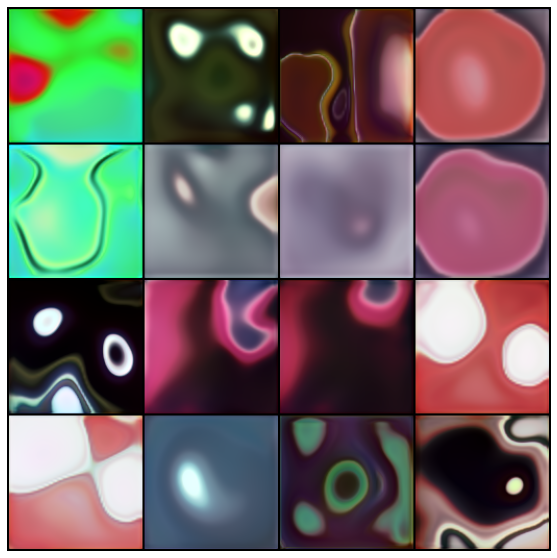

In [61]:
%%time
b = 16
noise = np.ones((b, model.image_size, model.image_size, 1))
z = np.zeros((b, model.latent_dim))

for i in range(b):
  z[i][i] = 0.5
  z[i][i+1] = 1
  z[i][i+2] = 0.5
  
  z[i][i + 64] = 0.5
  z[i][i + 65] = 1
  z[i][i + 66] = 0.5

samples = model.get_image_from_latents(z, noise)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(image_grid(samples, 4))

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([<matplotlib.axis.YTick at 0x15298aee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

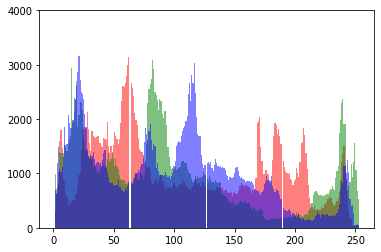

In [90]:
img = image_grid(samples, 4).numpy()

# convert to uin8
img = (img * 255).astype(np.uint8)

r = img[:,:,0].reshape(-1)
g = img[:,:,1].reshape(-1)
b = img[:,:,2].reshape(-1)

r, g, b = list(map(lambda x: x[x>0], [r,g,b]))
r, g, b = list(map(lambda x: x[x<254], [r,g,b]))

_ = plt.hist(r, color = 'r', bins = 256, alpha = 0.5)
_ = plt.hist(g, color = 'g', bins = 256, alpha = 0.5)
_ = plt.hist(b, color = 'b', bins = 256, alpha = 0.5)

plt.yticks(ticks = np.arange(0, 4001, 1000))

In [91]:
x = np.random.randint(0, 8193, size = (12, 1024))
x.shape

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(12, 1024)

In [92]:
x

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[3519, 8134,  530, ..., 3064, 5814, 1637],
       [1382, 3805, 5973, ..., 2614, 2134, 8063],
       [2589, 7944, 3906, ..., 5183, 4909, 5140],
       ...,
       [ 583, 7396, 2719, ..., 2565,  961, 7961],
       [6631, 2041, 7216, ..., 7643, 7673, 4861],
       [ 218, 2701, 1121, ..., 6272, 5459, 7982]])